<a href="https://colab.research.google.com/github/hazelkimhyejin/DEMO/blob/main/CT2011_Lab_03_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Prices in Vienna (Multiple Linear Regression)**


## **Import CSV file**

The dataset used in this exercise contains hotel prices in Vienna.

The variables are:

* **hotel_id**:
* **price**:
* **star**:
* **rating_tripadvisor**:
* **rating_website**:
* **distance_fr_citycentre1**:
* **distance_fr_citycentre2**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the relevant csv file
path = 'https://raw.githubusercontent.com/timcyku/ct2011/refs/heads/main/hotelsvienna.csv'

df = pd.read_csv(path)
# remove the column 'accommodation_type'; will treat all hotels the same
df = df.drop(columns=['accommodation_type'], axis=1)

# **Task 1 [4 marks]:**

* (a) Draw the scatter plot between the target variable ***price*** and the feature variable ***distance_fr_citycentre1***.
* (b) Create a new column in the dataframe df called ***log_price*** which is the log of the target variable ***price***. You may use the numpy function **np.log()** to compute the log of a number.
* (c) Draw the scatter plot between the target variable ***log_price*** and the feature variable ***distance_fr_citycentre1***.

In [ ]:
#(a)

In [2]:
df

,hotel_id,price,stars,rating_tripadvisor,rating_website,distance_fr_citycentre1,distance_fr_citycentre2
0,21894,81,4.0,4.5,4.4,2.7,4.4
1,21897,81,4.0,3.5,3.9,1.7,3.8
2,21901,85,4.0,3.5,3.7,1.4,2.5
3,21902,83,3.0,4.0,4.0,1.7,2.5
4,21903,82,4.0,3.5,3.9,1.2,2.8
...,...,...,...,...,...,...,...
317,22403,73,3.0,3.0,3.4,1.5,4.0
318,22404,109,3.0,3.0,5.0,1.5,3.8
319,22406,185,5.0,4.0,4.3,0.8,3.6
320,22407,100,4.0,4.5,4.4,1.0,3.7


<Axes: xlabel='price', ylabel='distance_fr_citycentre1'>

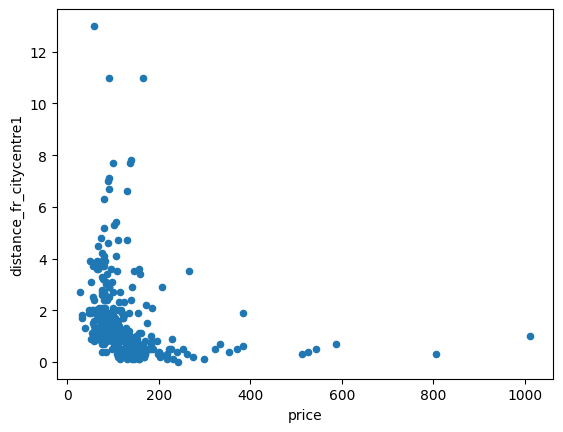

In [4]:
df.plot.scatter(x='price', y='distance_fr_citycentre1')

In [ ]:
#(b)

In [7]:
df['log_price'] = np.log(df['price'])
print(df)

     hotel_id  price  stars  rating_tripadvisor  rating_website  \
0       21894     81    4.0                 4.5             4.4   
1       21897     81    4.0                 3.5             3.9   
2       21901     85    4.0                 3.5             3.7   
3       21902     83    3.0                 4.0             4.0   
4       21903     82    4.0                 3.5             3.9   
..        ...    ...    ...                 ...             ...   
317     22403     73    3.0                 3.0             3.4   
318     22404    109    3.0                 3.0             5.0   
319     22406    185    5.0                 4.0             4.3   
320     22407    100    4.0                 4.5             4.4   
321     22408     58    3.0                 3.0             3.2   

     distance_fr_citycentre1  distance_fr_citycentre2  log_price  
0                        2.7                      4.4   4.394449  
1                        1.7                      3.8   4.394

In [ ]:
#(c)

<Axes: xlabel='log_price', ylabel='distance_fr_citycentre1'>

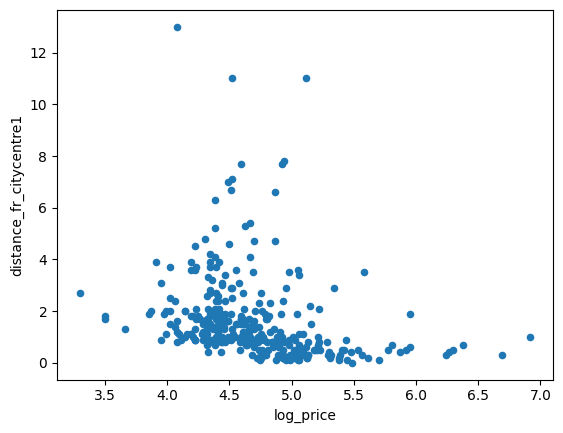

In [8]:
df.plot.scatter(x='log_price', y='distance_fr_citycentre1')

# **Task 2 [4 marks]:**

* (a) The line below drops the column ***price*** from df. Based on the resulting df, compute the **correlation matrix heatmap**.
* (b) Compute the correlations between each predictor/feature and ***log_price***, and sort them from the **smallest to the largest**.

In [18]:
#(a)
df = df.drop(columns=['price'], axis=1)

In [19]:
df

,hotel_id,stars,rating_tripadvisor,rating_website,distance_fr_citycentre1,distance_fr_citycentre2,log_price
0,21894,4.0,4.5,4.4,2.7,4.4,4.394449
1,21897,4.0,3.5,3.9,1.7,3.8,4.394449
2,21901,4.0,3.5,3.7,1.4,2.5,4.442651
3,21902,3.0,4.0,4.0,1.7,2.5,4.418841
4,21903,4.0,3.5,3.9,1.2,2.8,4.406719
...,...,...,...,...,...,...,...
317,22403,3.0,3.0,3.4,1.5,4.0,4.290459
318,22404,3.0,3.0,5.0,1.5,3.8,4.691348
319,22406,5.0,4.0,4.3,0.8,3.6,5.220356
320,22407,4.0,4.5,4.4,1.0,3.7,4.605170


In [ ]:
#(b)


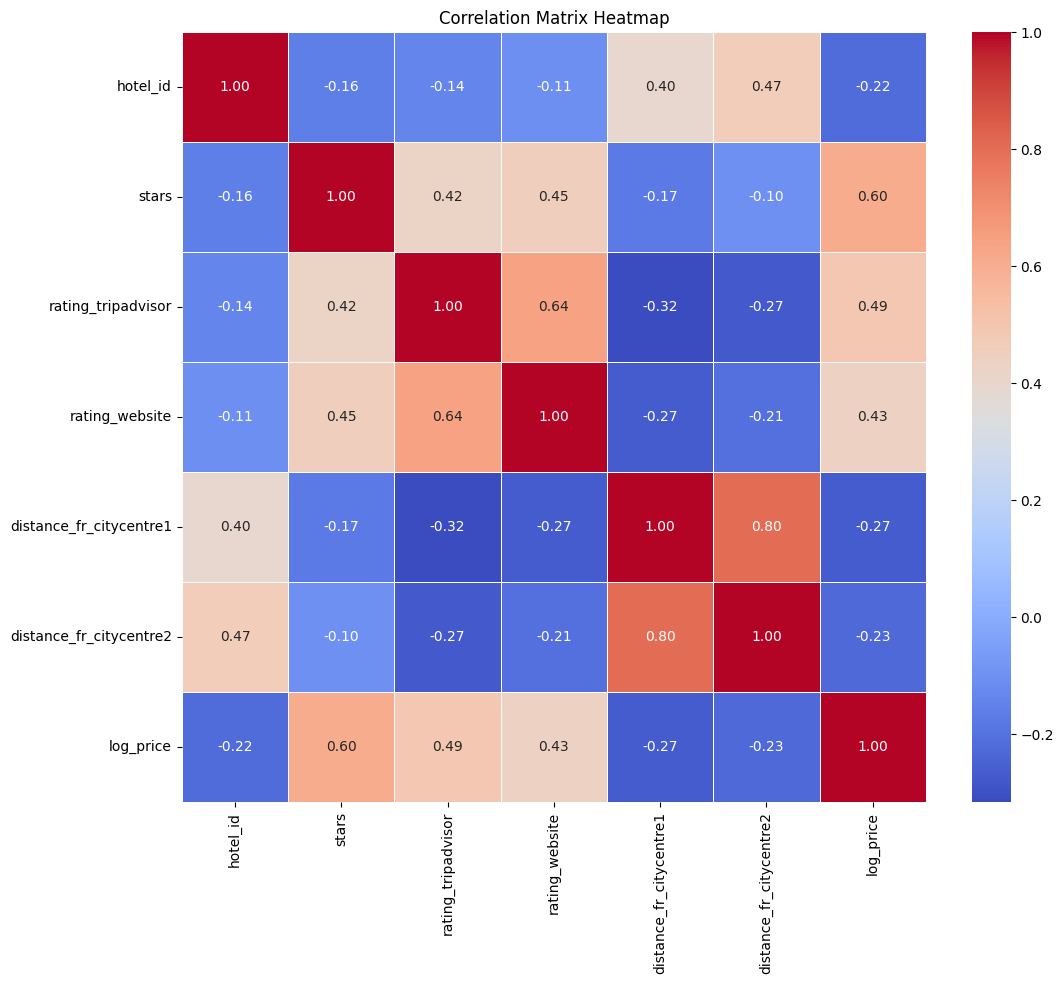

In [20]:
corr = df.corr(method='pearson') #spearman, pearson
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [27]:
log_price_corr = corr['log_price'].drop('log_price')
log_price_corr_sorted = log_price_corr.sort_values()
print(log_price_corr_sorted)

distance_fr_citycentre1   -0.270061
distance_fr_citycentre2   -0.227072
hotel_id                  -0.221633
rating_website             0.434160
rating_tripadvisor         0.490977
stars                      0.604317
Name: log_price, dtype: float64


# **Task 3 [4 marks]:**

Fit a multiple linear regression model with ***log_price*** as the target variable using the following set of features, and print out the results summary of each model.
* (a) **Model 1:** All the features (EXCLUDING ***hotel_id***)
* (b) **Model 2:** Two features (EXCLUDING ***hotel_id***) with the highest positive correlations with price

***

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant

In [ ]:
#(a)

In [28]:
df

,hotel_id,stars,rating_tripadvisor,rating_website,distance_fr_citycentre1,distance_fr_citycentre2,log_price
0,21894,4.0,4.5,4.4,2.7,4.4,4.394449
1,21897,4.0,3.5,3.9,1.7,3.8,4.394449
2,21901,4.0,3.5,3.7,1.4,2.5,4.442651
3,21902,3.0,4.0,4.0,1.7,2.5,4.418841
4,21903,4.0,3.5,3.9,1.2,2.8,4.406719
...,...,...,...,...,...,...,...
317,22403,3.0,3.0,3.4,1.5,4.0,4.290459
318,22404,3.0,3.0,5.0,1.5,3.8,4.691348
319,22406,5.0,4.0,4.3,0.8,3.6,5.220356
320,22407,4.0,4.5,4.4,1.0,3.7,4.605170


In [29]:
corr_with_log_price = df.corr(method='pearson')['log_price']
print(corr_with_log_price)

hotel_id                  -0.221633
stars                      0.604317
rating_tripadvisor         0.490977
rating_website             0.434160
distance_fr_citycentre1   -0.270061
distance_fr_citycentre2   -0.227072
log_price                  1.000000
Name: log_price, dtype: float64


In [30]:
corr_with_log_price.sort_values()

,log_price
distance_fr_citycentre1,-0.270061
distance_fr_citycentre2,-0.227072
hotel_id,-0.221633
rating_website,0.434160
rating_tripadvisor,0.490977
stars,0.604317
log_price,1.000000


**(b) Using log_price as the target variable, two features with highest positive are: stars and rating_tripadvisor.**

# **Task 4 [4 marks]:**

* (a) By trial-and-error or otherwise, find a set of features (EXCLUDING ***hotel_id***) that yields a multiple linear regression model that has better Adjusted R-squared than Model 1 and Model 2, and is still significant overall.

* (b) Comment on the diagnostic of residuals and multicollinearity of your model.

In [42]:
# (a)
# By trial-and-error or otherwise, find a set of features (EXCLUDING hotel_id) that yields a multiple linear regression model
# that has better Adjusted R-squared than Model 1 and Model 2, and is still significant overall.

# Based on the correlations, the features with the highest positive correlations with log_price are
# 'stars', 'rating_tripadvisor', and 'rating_website'.
# Model 2 used 'stars' and 'rating_tripadvisor'. Let's try adding 'rating_website' to see if it improves the adjusted R-squared.

# Features for Model 3
features_model3 = ['stars', 'rating_tripadvisor', 'rating_website']
y = df['log_price']

# Fit Model 3
Model3 = MLR_model(features_model3, y)

# Print the summary of Model 3
print("Model 3 Summary (Features: stars, rating_tripadvisor, rating_website):")
print(Model3.summary())

Model 3 Summary (Features: stars, rating_tripadvisor, rating_website):
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     81.62
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           3.53e-39
Time:                        03:39:44   Log-Likelihood:                -133.32
No. Observations:                 322   AIC:                             274.6
Df Residuals:                     318   BIC:                             289.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [43]:
#(a)

In [44]:
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant

In [45]:
def MLR_model(selected_features, y):
    X = df[selected_features]
    scaler = StandardScaler().fit(X)
    X_scaled_vars = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled_vars, columns=selected_features)
    X_scaled_df = add_constant(X_scaled_df)
    return OLS(y, X_scaled_df).fit()

In [46]:
# (b)

In [47]:
Features3 = ['distance_fr_citycentre1', 'distance_fr_citycentre2', 'hotel_id', 'rating_website', 'rating_tripadvisor', 'stars', 'log_price']
y = df['log_price']
Model3 = MLR_model(Features3, y)
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.572e+30
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:39:51   Log-Likelihood:                 10648.
No. Observations:                 322   AIC:                        -2.128e+04
Df Residuals:                     314   BIC:                        -2.125e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Task 3b Comment on diagnostic of residuals and multicollinearity of model
Omnibus test is significant (Prob(Omnibus) = 0.000), suggesting that the residuals are not normally distributed.
Jarque-Bera test also confirms non-normality of residuals (Prof(JB) = 2.66e-11).
Skewness (-0.227) indicates a slight left skew in residuals.
Kurtosis (4.850) suggests that residual distribution has heavier tails than a normal distribution.
Durbin-Watson statistic (0.207) is close to 0, indicating positive auto correlation in residuals.

Multicollinearity Anaysis:
Condition Number (Cond. No. = 404) is relatively low (typically values above 30 indicate siginificant multicollinearity), suggesting that multicollinearity is not a major issue in this model. **bold text**

## **Model 1**

Features selected: stars, rating_tripadvisor

The features above are selected in view of their strong correlation with the target variable 'log_price'


# **Task 5 [4 marks]:**

Using your model in Task 4, identify the top 5 best hotel deals. Hint: The lower the observed price than the predicted price, the better the hotel deal.

In [48]:
# Using your model in Task 4, identify the top 5 best hotel deals.
# Hint: The lower the observed price than the predicted price, the better the hotel deal.

# Assuming Model 2 from Task 3(b) is the model to use from Task 4,
# which uses 'stars' and 'rating_tripadvisor' as features.

# Define features and target
features_task4 = ['stars', 'rating_tripadvisor']
y_task4 = df['log_price']
X_task4 = df[features_task4]

# Scale the features
scaler_task4 = StandardScaler().fit(X_task4)
X_scaled_vars_task4 = scaler_task4.transform(X_task4)
X_scaled_df_task4 = pd.DataFrame(X_scaled_vars_task4, columns=features_task4)

# Add a constant for the intercept
X_scaled_df_task4 = add_constant(X_scaled_df_task4)

# Fit the OLS model
model_task4 = OLS(y_task4, X_scaled_df_task4).fit()

# Get predicted log prices
df['predicted_log_price'] = model_task4.predict(X_scaled_df_task4)

# Calculate the difference between observed and predicted log prices
df['log_price_difference'] = df['log_price'] - df['predicted_log_price']

# Reload the original data to get the 'price' column back
path = 'https://raw.githubusercontent.com/timcyku/ct2011/refs/heads/main/hotelsvienna.csv'
original_df = pd.read_csv(path)

# Merge the 'price' column back into the current dataframe using 'hotel_id'
df = pd.merge(df, original_df[['hotel_id', 'price']], on='hotel_id', how='left')


# Identify the top 5 best deals (hotels where observed log price is lower than predicted log price)
# A lower observed price than predicted price means a larger negative difference,
# but the hint says "lower the observed price than the predicted price", implying we want
# hotels where the actual price is less than what the model predicts. This means we are looking
# for the largest *negative* difference, or the smallest positive difference.
# Let's sort by the difference in ascending order to find the largest negative differences first.
top_5_deals = df.sort_values(by='log_price_difference').head(5)

print("Top 5 Best Hotel Deals:")
display(top_5_deals[['hotel_id', 'price', 'log_price', 'predicted_log_price', 'log_price_difference']])

Top 5 Best Hotel Deals:


,hotel_id,price,log_price,predicted_log_price,log_price_difference
30,21949,27,3.295837,4.071443,-0.775606
9,21912,60,4.094345,4.835109,-0.740765
115,22085,64,4.158883,4.835109,-0.676226
280,22344,50,3.912023,4.528740,-0.616717
150,22143,68,4.219508,4.835109,-0.615601
